<a href="https://colab.research.google.com/github/JumanaWanass/OpenCV/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.   Import necessary libraries







In [185]:
import cv2 
import numpy as np
import pytesseract
from matplotlib import pyplot as plt 
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2. Proccesing image pre OCR

##2.1 Display Image

In [175]:
def display(path):
    dpi = 80
    image_data = plt.imread(path)

    height, width  = image_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(image_data, cmap='gray')

    plt.show()

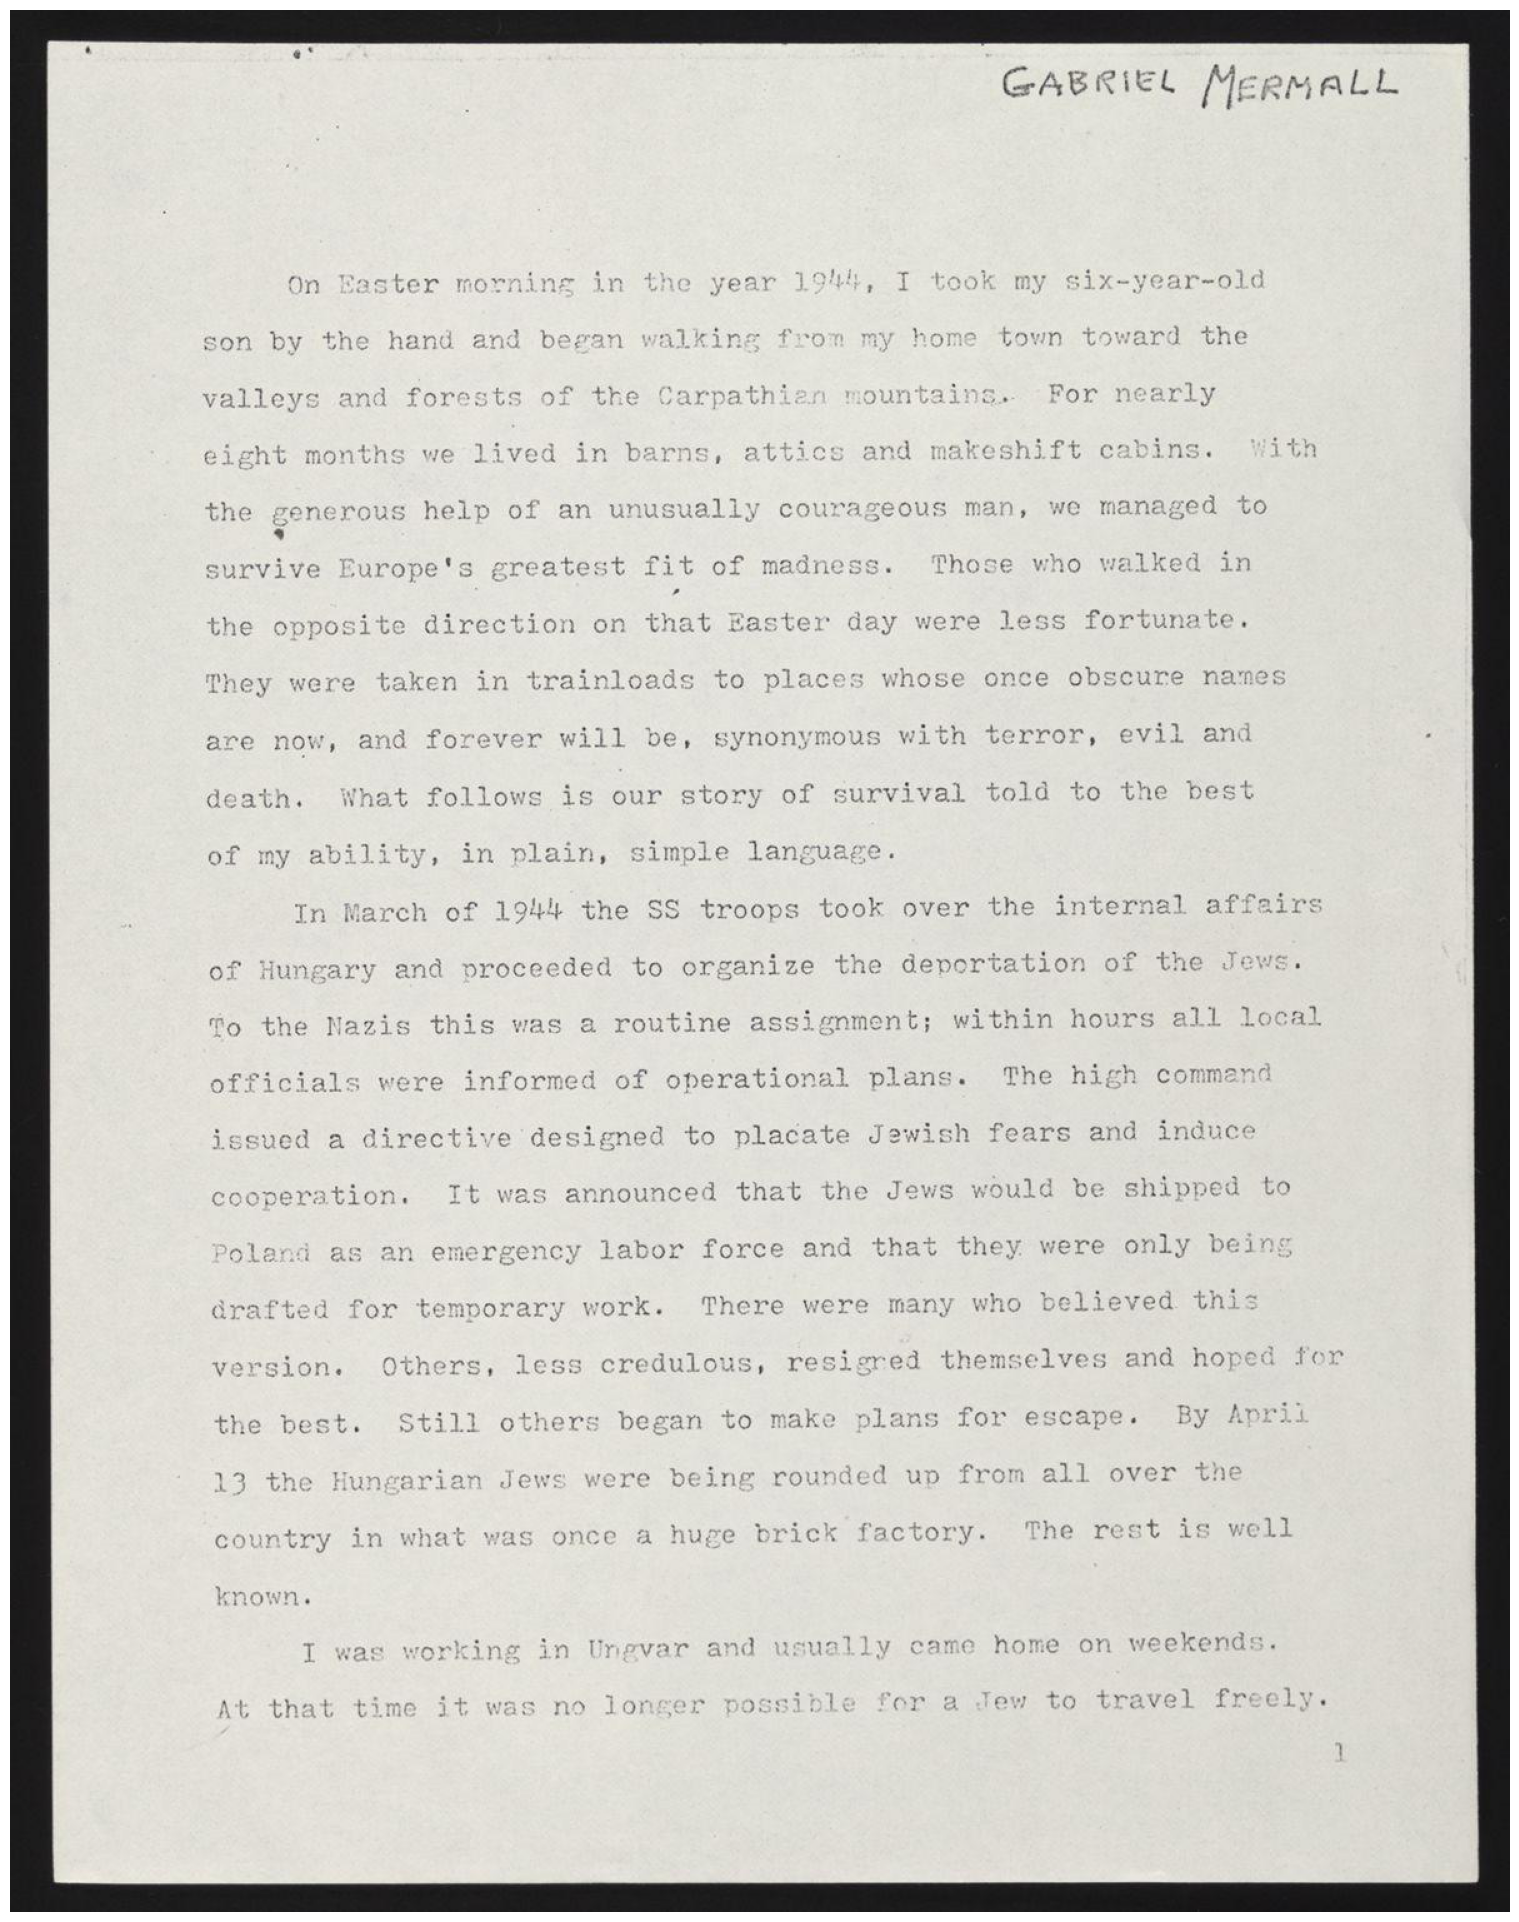

In [186]:
display("/Document.jpg")


##2.2 Resize

In [177]:
def resize(image, scale):
    width = int(image.shape[1] * scale / 100)
    height = int(image.shape[0] * scale / 100)
    dim = (width, height)
    resized_img = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_img

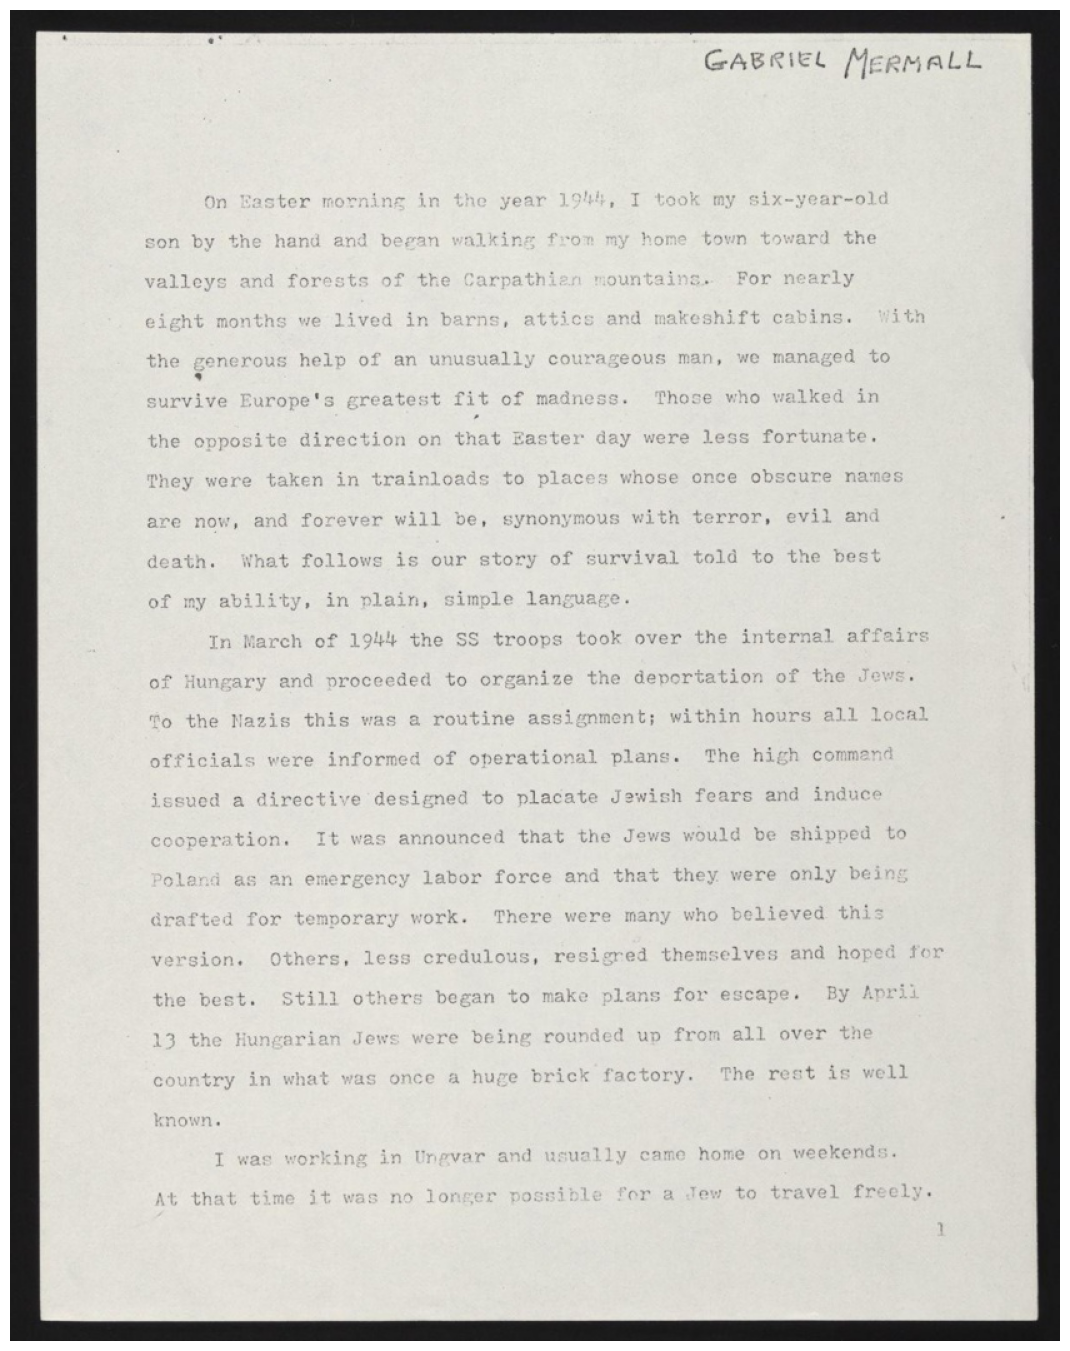

In [187]:
Original_image = cv2.imread("/Document.jpg")
Resized_image = resize(Original_image, 70)
cv2.imwrite("/Resized.jpg", Resized_image)
display("/Resized.jpg")

##2.3 Binarise image

### Turning image to grayscale

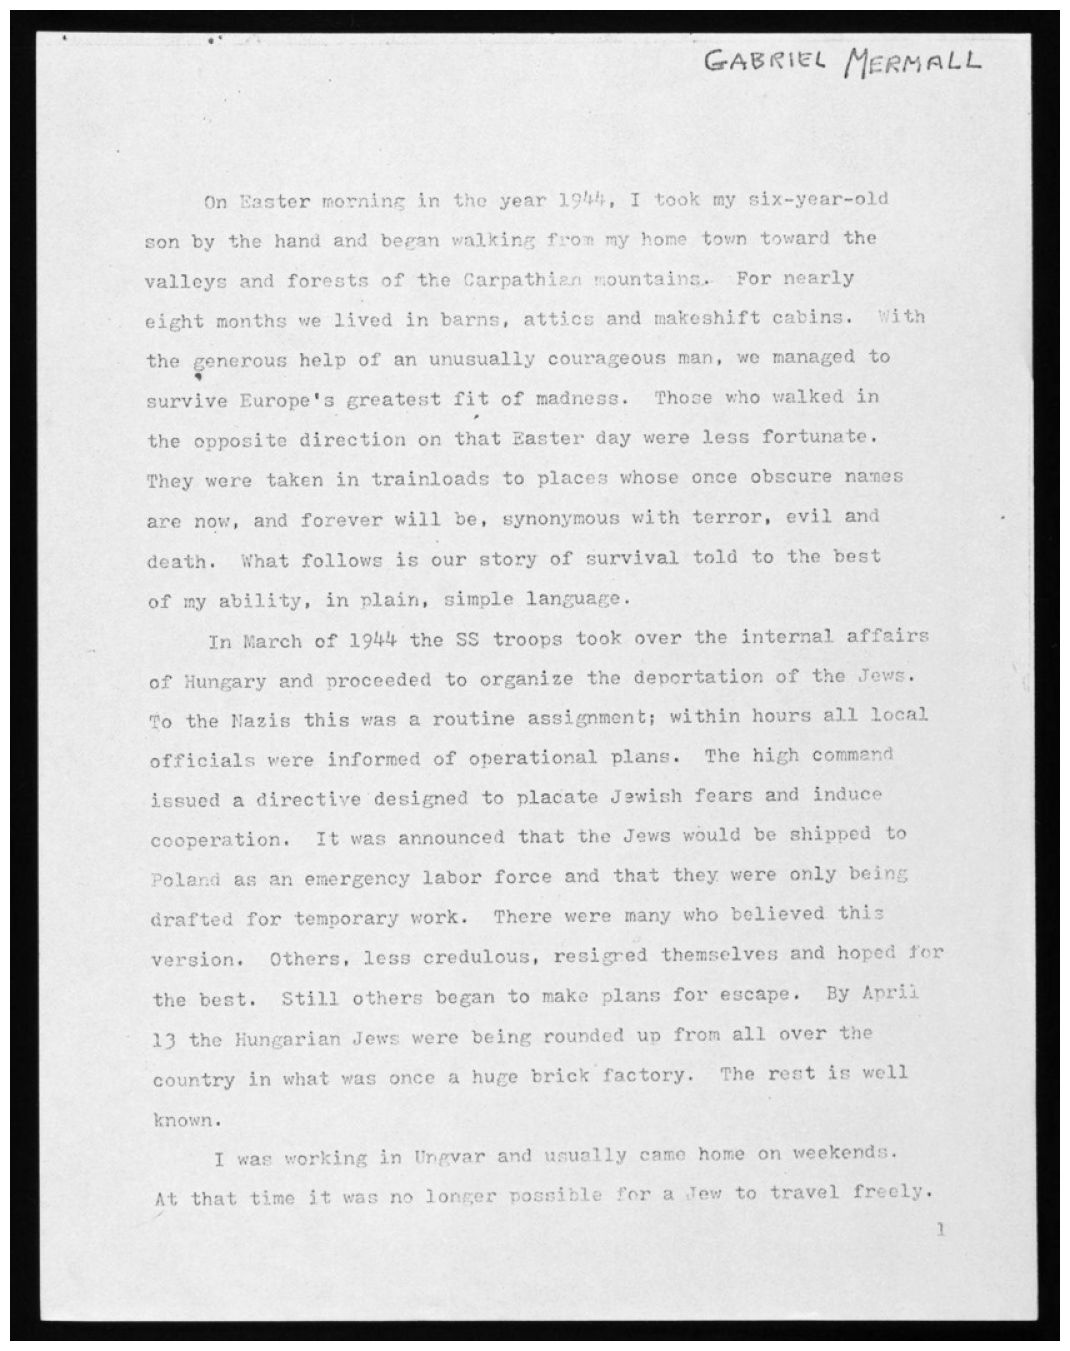

In [188]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

GrayImage = grayscale(Resized_image)
cv2.imwrite("/GrayImage.jpg", GrayImage)
display("/GrayImage.jpg")

### Simple Threshold

In [189]:
threshold_value = 210
max_value = 230
ret, SimpleThresh = cv2.threshold(GrayImage, threshold_value, max_value, cv2.THRESH_BINARY)
cv2.imwrite("/SimpleThresh.jpg", SimpleThresh)


True

###Gaussian Threshold 

In [190]:
block_size = 21
constant = 11
GaussianThresh = cv2.adaptiveThreshold(GrayImage, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)
cv2.imwrite("/GaussianThresh.jpg", GaussianThresh)


True

### Compare Gaussian and Simple Thresholding 

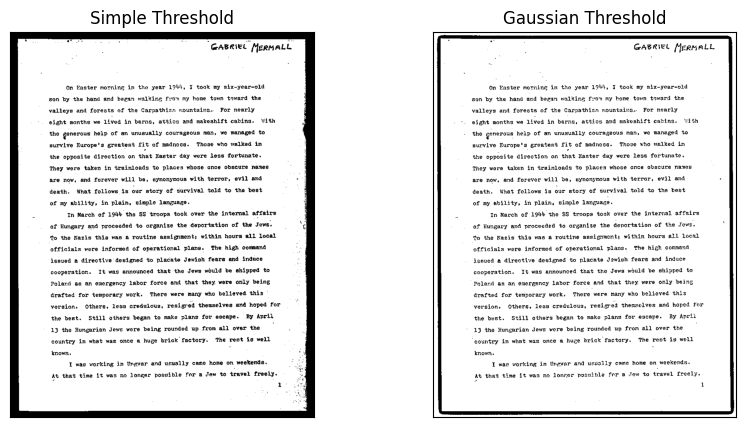

In [191]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the first image in the first subplot
axs[0].imshow(SimpleThresh, cmap='gray')
axs[0].set_title('Simple Threshold')

# Plot the second image in the second subplot
axs[1].imshow(GaussianThresh, cmap='gray')
axs[1].set_title('Gaussian Threshold')
# remove the tick marks
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])

# Show the plot
plt.show()

*As evident, Gaussian Thresholding is more effective at getting rid of noise*

##2.4 Remove borders

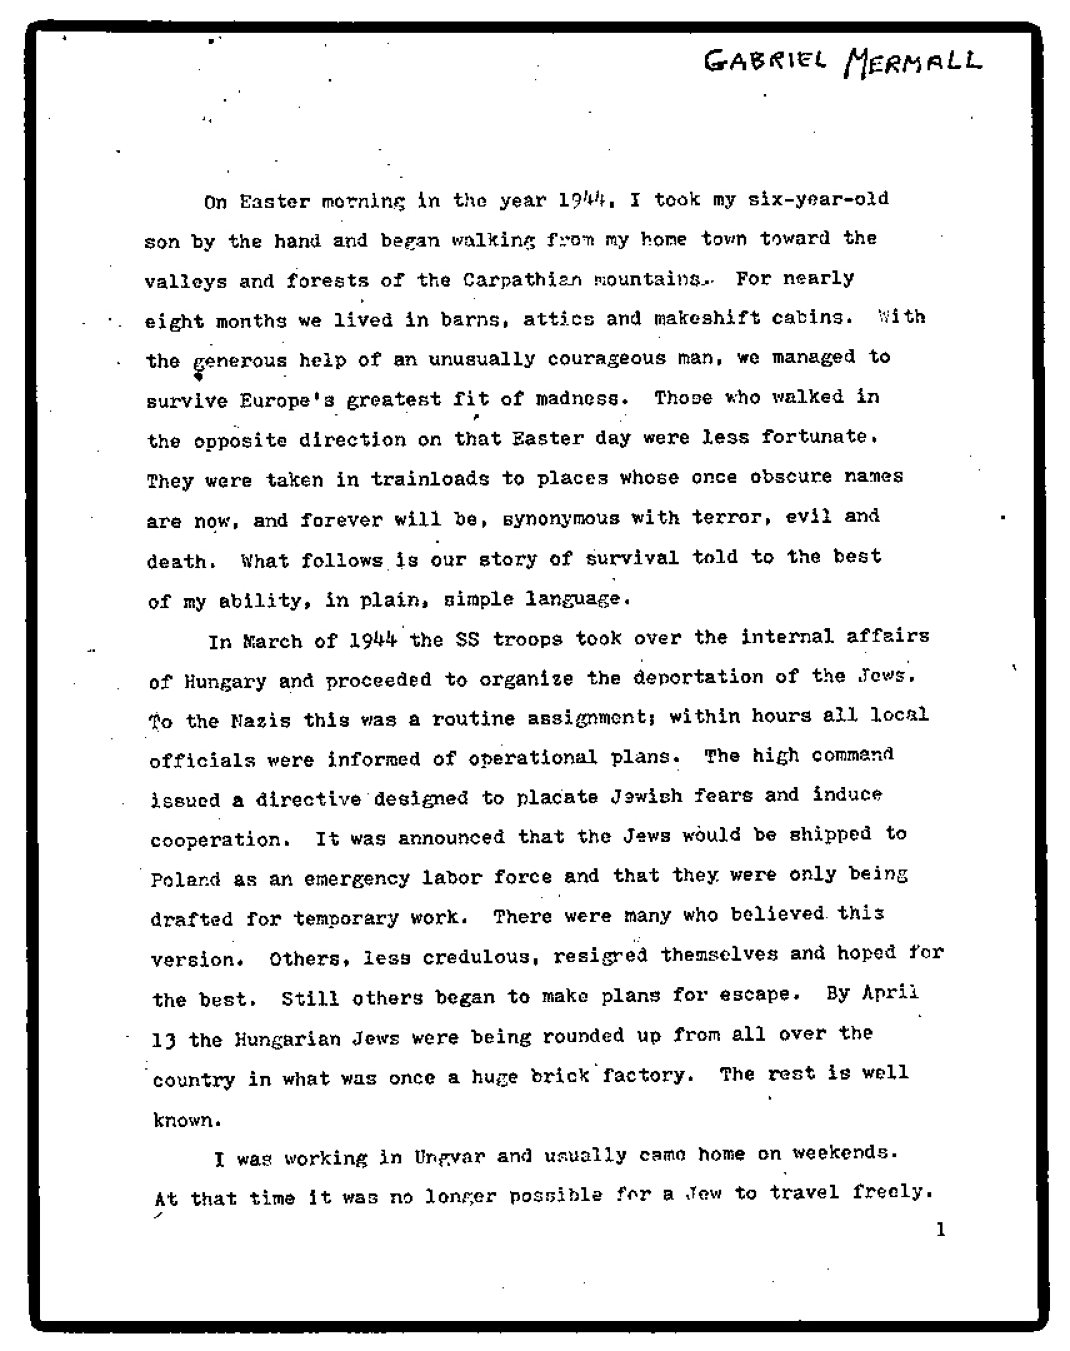

In [192]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return crop

no_borders = remove_borders(GaussianThresh)
cv2.imwrite("/NoBorders.jpg", no_borders)
display("/NoBorders.jpg")

#3. Use Pytesseract to perform OCR

In [193]:
ocr_result = pytesseract.image_to_string(no_borders)
print (ocr_result)

GABRIEL Meamall

On Easter motning in the year 1944, I took my six-year-old
son by the hand and began walking fron my home town toward the
valleys and forests of the Carpathian mountaing.. For nearly
eight months we livea in barns, attics and makeshift cabins. with
the generous help of an unusually courageous man, we managed to
survive Europe's greatest fit of madness. Thove who walked in
the opposite direction on that Easter day were less fortunate.
They were taken in trainloads to places whose once obscure nanes
are now, and forever will be, synonymous with terror, evil and
death. What follows is our story of survival told to the best
of my ability, in plain, simple language.

In March of 1944'the $S troops took over the internal affairs
of Hungary and proceeded to organize the deportation of the Jews,
‘to the Nazis this was a routine assignment; within hours all local
officials were informed of operational plans. The high commend
issued a directive designed to placate Jawish fears a